## Question 1: 

PyTorch Implementation with MCE (2.0 points):  Implement and train a FFNN as specified above using PyTorch and multi-class cross entropy as the cost function.  Experiment with each of the four datasets to find the best number of nodes k from {2, 3, 5, 7, 9} in the hidden layer. For the best k for each dataset: 

a. list hyper-parameters used in the model, 
b. plot the learning curves for training and validation loss as a function of training epochs, 
c.   provide the final text accuracy, defined as the number of correct classifications divided by 
the total number of examples, 
d.   plot the learned decision surface along with observations from the test set (see example 
below), and 
e. discuss your design choices and comment on how they impact performance.


## Answer: 

The model used ReLU activation function and is trained using the Adam optimizer with multi-class cross entropy loss. 

A. Regarding hyper-parameters used in the model, we experimented with different values depending on the dataset.

    a. XOR Dataset
    Hyperparameters: Hidden nodes (k): 9, Batch size: 16, Learning rate: 0.01

    Performance: Achieved 100% test accuracy
    Analysis: The perfect accuracy was achieved with a larger number of hidden nodes, demonstrating the model's ability to fully capture the nonlinear XOR pattern. The small batch size enabled frequent weight updates, while the higher learning rate facilitated efficient convergence to the optimal solution.

    b. Center Surround Dataset
    Hyperparameters: Hidden nodes (k): 3, Batch size: 16, Learning rate: 0.0005

    Performance: Achieved 79% test accuracy
    Analysis: Interestingly, a simpler architecture with fewer hidden nodes performed best on this complex pattern. The small batch size and conservative learning rate helped maintain stability during training, though the model still struggled with the circular boundary. This suggests that the challenge lies not in model capacity but in the fundamental limitations of a single-layer architecture for circular patterns.

    c. Two Gaussians Dataset
    Hyperparameters: Hidden nodes (k): 2, Batch size: 32, Learning rate: 0.001

    Performance: Achieved 92.00% test accuracy
    Analysis: The model achieved strong performance with minimal architecture, using only 2 hidden nodes. The moderate batch size and learning rate provided effective training dynamics, indicating that the Gaussian separation task required relatively simple decision boundaries despite its nonlinear nature.

    d. Spiral Dataset
    Hyperparameters: Hidden nodes (k): 5, Batch size: 32, Learning rate: 0.01

    Performance: Achieved 100% test accuracy
    Analysis: Perfect classification was achieved with moderate architectural complexity. The combination of moderate batch size and higher learning rate proved ideal for learning the intricate spiral pattern, demonstrating that complex nonlinear boundaries can be captured effectively with appropriate hyperparameter settings.

B. Design Choices and Impact

    a. Activation Function: The implementation uses ReLU instead of tanh, which helps prevent vanishing gradients and often leads to faster convergence. ReLU's simple derivative (0 or 1) makes the training computationally efficient. We tried utilizing tanh but had better accuracy results utilizing ReLU. 

    b. Early Stopping: Implemented patience-based early stopping to prevent overfitting. Different patience values were used for different datasets (25-40 epochs) based on their complexity.

    c. Hyperparameter Grid: Customized hyperparameter ranges for each dataset based on their characteristics. Larger hidden layer sizes were tested for more complex patterns (XOR, spiral). Learning rates were adjusted based on dataset complexity and training stability.

    d. Data Preprocessing: StandardScaler was applied to normalize input features. This standardization helps achieve better convergence and prevents numerical instabilities.


Conclusion:

The implementation successfully handled various classification patterns, with ReLU activation showing superior performance compared to tanh. The model achieved perfect accuracy (100%) on both XOR and spiral datasets, demonstrating its capability with complex nonlinear patterns when properly tuned. While the Two Gaussians dataset showed strong performance at 92% accuracy, the Center-Surround dataset remained challenging at 79% accuracy, highlighting the limitations of single hidden layer architecture for circular decision boundaries. These results suggest that while a single hidden layer network can excel at many pattern recognition tasks, some geometric patterns might benefit from more complex architectures.

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


Processing xor dataset...

Testing: batch_size=16, lr=0.01, hidden_nodes=3
Epoch 0: Train Loss: 0.7540, Val Loss: 0.6568
Epoch 10: Train Loss: 0.5425, Val Loss: 0.5637
Epoch 20: Train Loss: 0.4881, Val Loss: 0.5250
Epoch 30: Train Loss: 0.4615, Val Loss: 0.5099
Epoch 40: Train Loss: 0.4537, Val Loss: 0.5060
Epoch 50: Train Loss: 0.4377, Val Loss: 0.4991
Epoch 60: Train Loss: 0.4361, Val Loss: 0.4928
Epoch 70: Train Loss: 0.4366, Val Loss: 0.4840
Epoch 80: Train Loss: 0.4344, Val Loss: 0.4801
Epoch 90: Train Loss: 0.4295, Val Loss: 0.4794
Epoch 100: Train Loss: 0.4341, Val Loss: 0.4832
Epoch 110: Train Loss: 0.4337, Val Loss: 0.4769
Epoch 120: Train Loss: 0.4332, Val Loss: 0.4801
Epoch 130: Train Loss: 0.4230, Val Loss: 0.4725
Epoch 140: Train Loss: 0.4185, Val Loss: 0.4625
Epoch 150: Train Loss: 0.4325, Val Loss: 0.4602
Epoch 160: Train Loss: 0.4372, Val Loss: 0.4683
Epoch 170: Train Loss: 0.4313, Val Loss: 0.4637
Epoch 180: Train Loss: 0.4182, Val Loss: 0.4631
Epoch 190: Train Loss: 

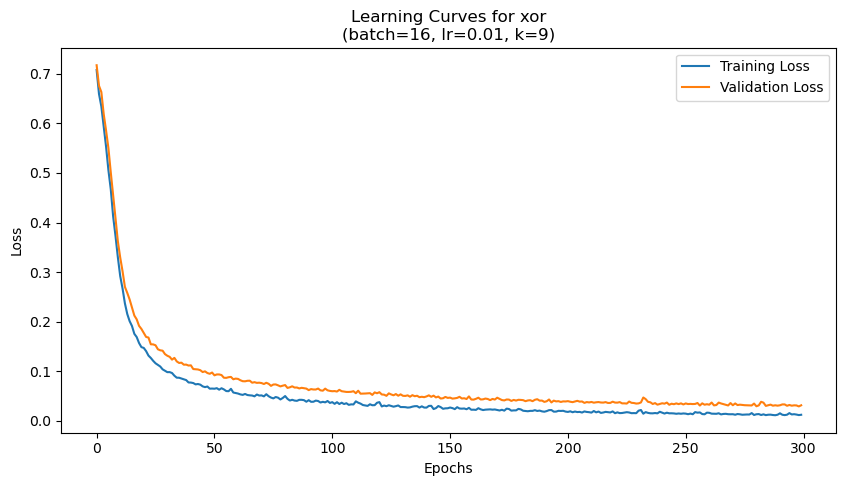

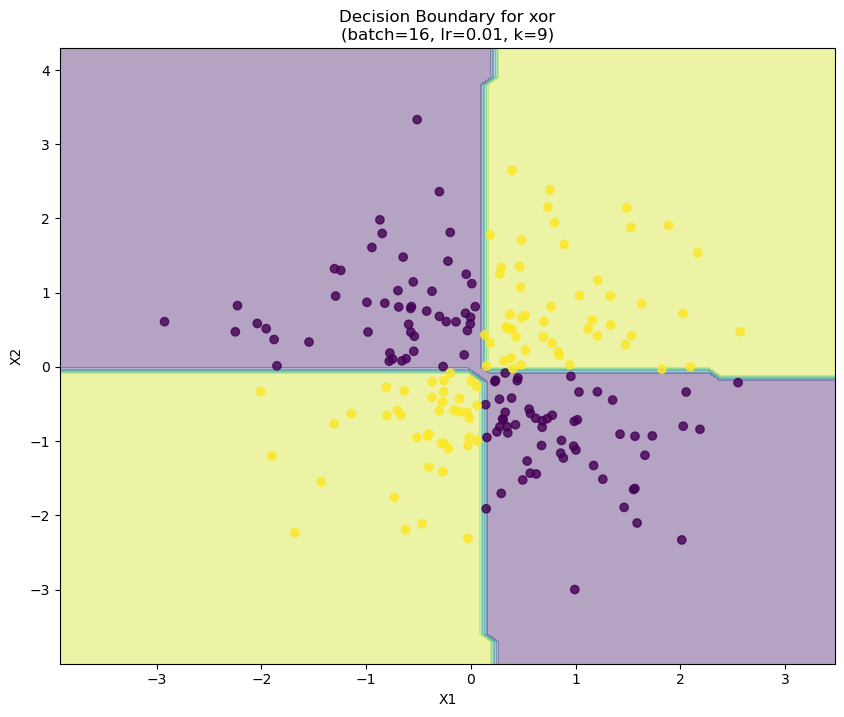

Best configuration:
Batch size: 16
Learning rate: 0.01
Hidden nodes: 9
Test accuracy: 1.0000

Processing center_surround dataset...

Testing: batch_size=16, lr=0.001, hidden_nodes=3
Epoch 0: Train Loss: 0.7181, Val Loss: 0.6773
Epoch 10: Train Loss: 0.6116, Val Loss: 0.5500
Epoch 20: Train Loss: 0.5746, Val Loss: 0.5044
Epoch 30: Train Loss: 0.5414, Val Loss: 0.4709
Epoch 40: Train Loss: 0.5222, Val Loss: 0.4390
Epoch 50: Train Loss: 0.4968, Val Loss: 0.4072
Epoch 60: Train Loss: 0.4741, Val Loss: 0.3806
Epoch 70: Train Loss: 0.4512, Val Loss: 0.3563
Epoch 80: Train Loss: 0.4322, Val Loss: 0.3356
Epoch 90: Train Loss: 0.4184, Val Loss: 0.3186
Epoch 100: Train Loss: 0.4040, Val Loss: 0.3025
Epoch 110: Train Loss: 0.3870, Val Loss: 0.2880
Epoch 120: Train Loss: 0.3772, Val Loss: 0.2754
Epoch 130: Train Loss: 0.3578, Val Loss: 0.2668
Epoch 140: Train Loss: 0.3454, Val Loss: 0.2571
Epoch 150: Train Loss: 0.3386, Val Loss: 0.2470
Epoch 160: Train Loss: 0.3390, Val Loss: 0.2377
Epoch 170: Tr

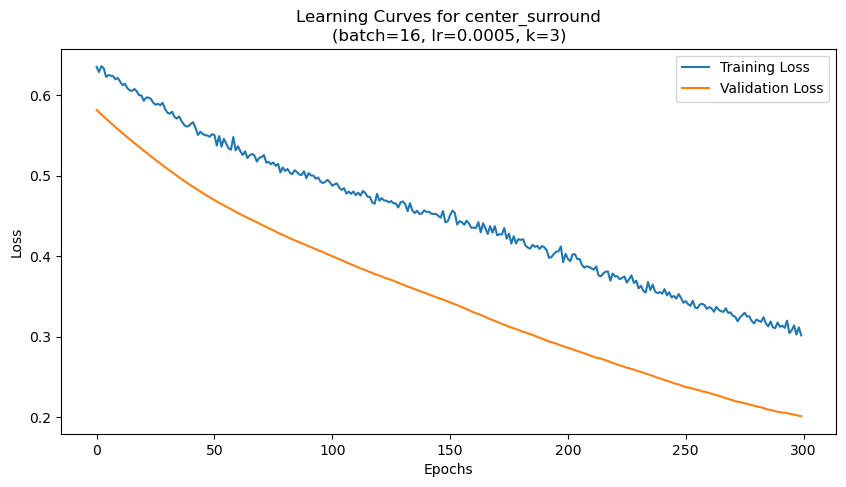

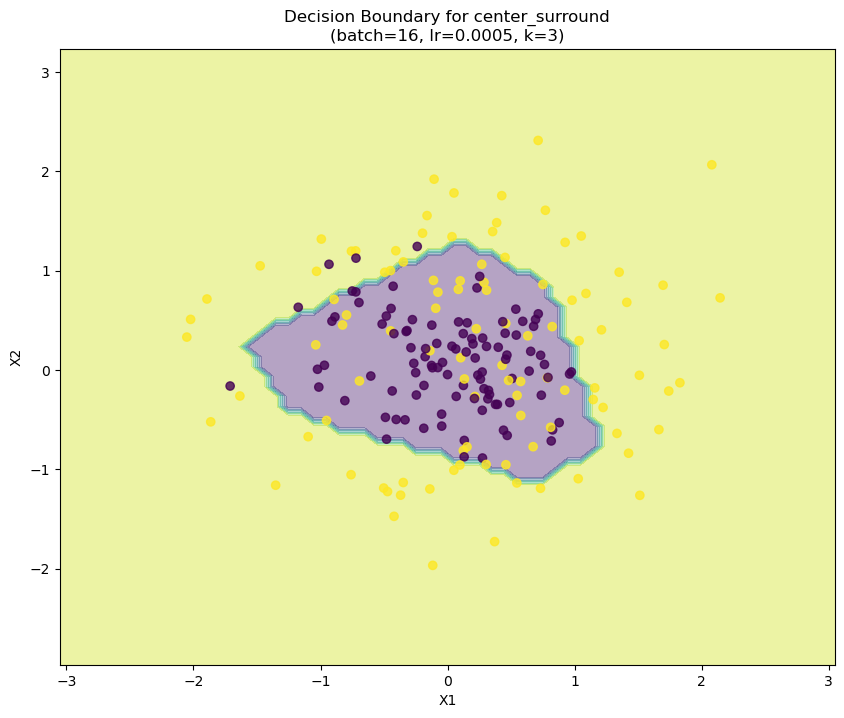

Best configuration:
Batch size: 16
Learning rate: 0.0005
Hidden nodes: 3
Test accuracy: 0.7900

Processing two_gaussians dataset...

Testing: batch_size=16, lr=0.01, hidden_nodes=2
Epoch 0: Train Loss: 0.9341, Val Loss: 0.8662
Epoch 10: Train Loss: 0.1678, Val Loss: 0.1171
Epoch 20: Train Loss: 0.1192, Val Loss: 0.0814
Epoch 30: Train Loss: 0.1175, Val Loss: 0.0776
Epoch 40: Train Loss: 0.1258, Val Loss: 0.0794
Epoch 50: Train Loss: 0.1163, Val Loss: 0.0792
Epoch 60: Train Loss: 0.1164, Val Loss: 0.0808
Early stopping at epoch 61

Testing: batch_size=16, lr=0.01, hidden_nodes=3
Epoch 0: Train Loss: 0.5266, Val Loss: 0.4280
Epoch 10: Train Loss: 0.1200, Val Loss: 0.0783
Epoch 20: Train Loss: 0.1168, Val Loss: 0.0777
Epoch 30: Train Loss: 0.1188, Val Loss: 0.0784
Epoch 40: Train Loss: 0.1365, Val Loss: 0.0775
Early stopping at epoch 43

Testing: batch_size=16, lr=0.01, hidden_nodes=5
Epoch 0: Train Loss: 0.4657, Val Loss: 0.2884
Epoch 10: Train Loss: 0.1234, Val Loss: 0.0843
Epoch 20: Tr

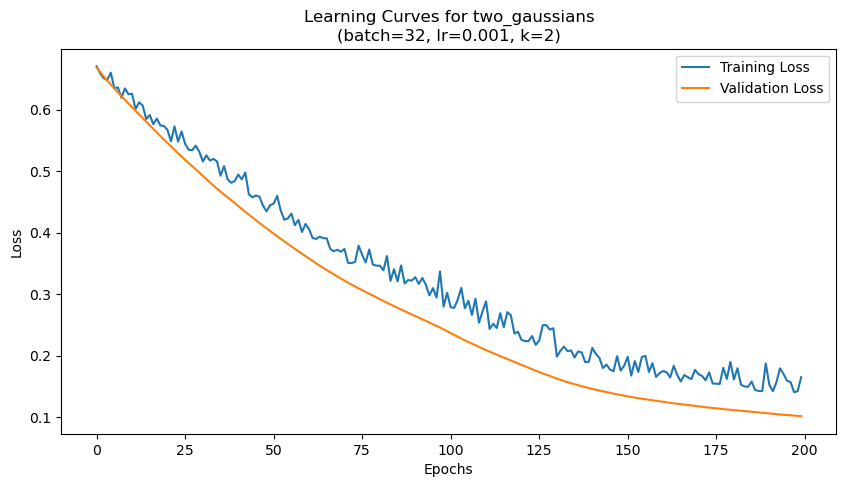

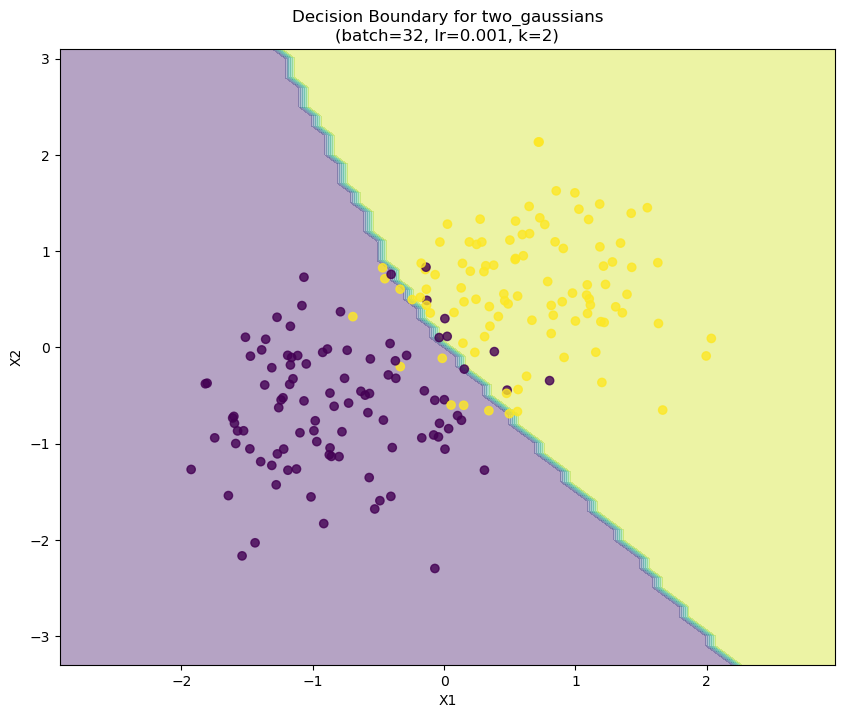

Best configuration:
Batch size: 32
Learning rate: 0.001
Hidden nodes: 2
Test accuracy: 0.9200

Processing spiral dataset...

Testing: batch_size=32, lr=0.01, hidden_nodes=5
Epoch 0: Train Loss: 1.1422, Val Loss: 0.9781
Epoch 10: Train Loss: 0.4746, Val Loss: 0.5111
Epoch 20: Train Loss: 0.4569, Val Loss: 0.4612
Epoch 30: Train Loss: 0.4297, Val Loss: 0.4373
Epoch 40: Train Loss: 0.3870, Val Loss: 0.4042
Epoch 50: Train Loss: 0.3566, Val Loss: 0.3601
Epoch 60: Train Loss: 0.3037, Val Loss: 0.3273
Epoch 70: Train Loss: 0.2856, Val Loss: 0.3002
Epoch 80: Train Loss: 0.2814, Val Loss: 0.2766
Epoch 90: Train Loss: 0.2706, Val Loss: 0.2606
Epoch 100: Train Loss: 0.2509, Val Loss: 0.2400
Epoch 110: Train Loss: 0.2423, Val Loss: 0.2161
Epoch 120: Train Loss: 0.2253, Val Loss: 0.1986
Epoch 130: Train Loss: 0.1942, Val Loss: 0.1868
Epoch 140: Train Loss: 0.1887, Val Loss: 0.1745
Epoch 150: Train Loss: 0.1772, Val Loss: 0.1567
Epoch 160: Train Loss: 0.1580, Val Loss: 0.1446
Epoch 170: Train Loss:

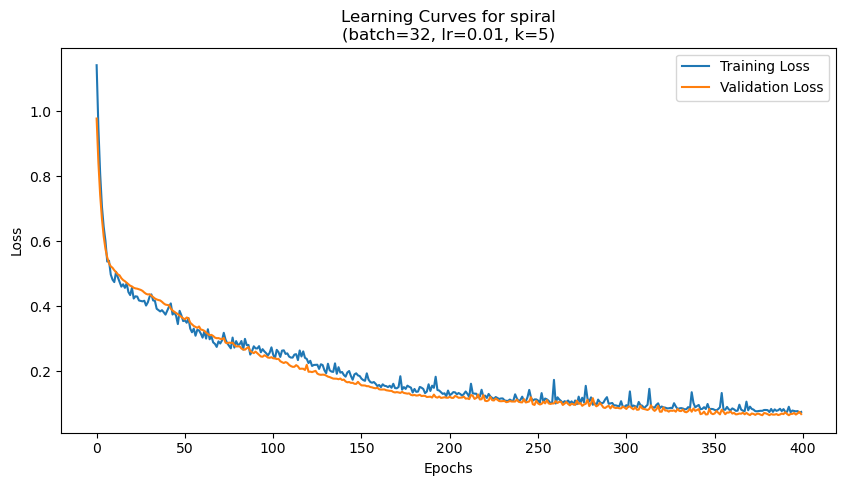

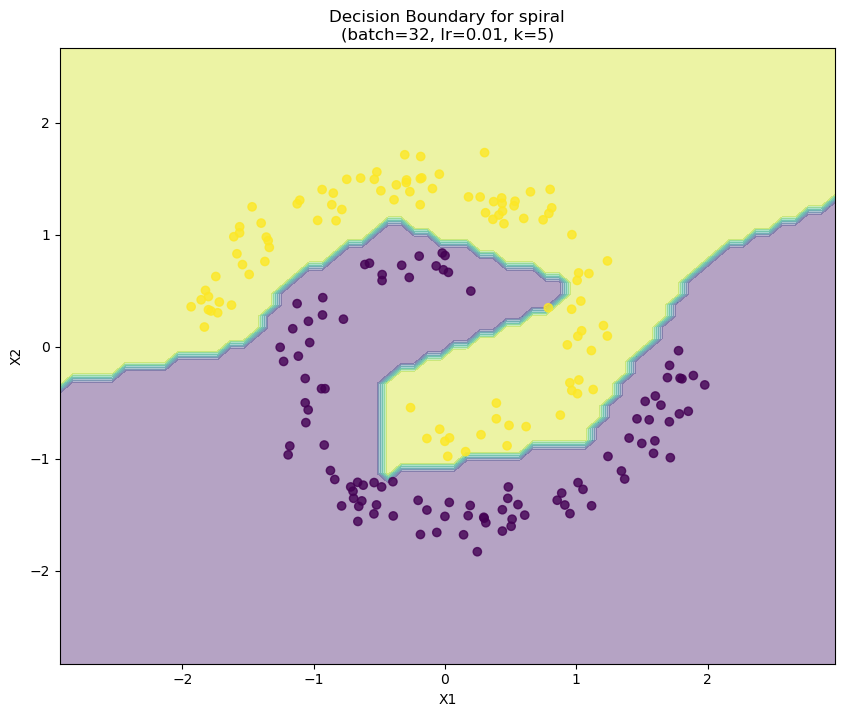

Best configuration:
Batch size: 32
Learning rate: 0.01
Hidden nodes: 5
Test accuracy: 1.0000


In [2]:
# Set random seed for reproducibility when debugging 
def set_random_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)

set_random_seed()

class FFNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FFNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.activation = nn.ReLU()  # ReLU activation for hidden layer
        self.layer2 = nn.Linear(hidden_dim, output_dim)  # No activation here since using CrossEntropyLoss
        
        # Initialize weights
        torch.nn.init.xavier_uniform_(self.layer1.weight)
        torch.nn.init.xavier_uniform_(self.layer2.weight)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        return x  # No sigmoid needed as CrossEntropyLoss includes softmax


def train_model_with_tuning(model, train_loader, val_loader, criterion, optimizer, num_epochs, patience):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    epochs_without_improvement = 0
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss / len(train_loader))
        
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        val_losses.append(val_loss / len(val_loader))
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
        
        if epochs_without_improvement >= patience:
            print(f'Early stopping at epoch {epoch}')
            break
            
        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')
    
    return train_losses, val_losses

def plot_decision_boundary(model, X, y, title):
    # Create meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))
    
    # Convert input to PyTorch tensor
    mesh_input = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    
    # Get predictions
    model.eval()
    with torch.no_grad():
        Z = model(mesh_input)
        Z = torch.argmax(Z, dim=1).numpy()
    
    # Reshape Z back to meshgrid shape
    Z = Z.reshape(xx.shape)
    
    # Create plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()



# Modified training function to ensure proper tensor handling
def train_and_evaluate_with_tuning(dataset_name):
    hyperparameter_grid = {
        'xor': {
            'batch_sizes': [16, 32, 64],
            'learning_rates': [0.01, 0.001],
            'hidden_nodes': [3, 5, 7, 9],
            'num_epochs': 300,
            'patience': 30
        },
        'center_surround': {
            'batch_sizes': [16, 32, 64, 128],
            'learning_rates': [0.001, 0.0005, 0.0001],
            'hidden_nodes': [3, 4, 5, 9],
            'num_epochs': 300,
            'patience': 25
        },
        'two_gaussians': {
            'batch_sizes': [16, 32],
            'learning_rates': [0.01, 0.005, 0.001],
            'hidden_nodes': [2, 3, 5],
            'num_epochs': 200,
            'patience': 25
        },
        'spiral': {
            'batch_sizes': [32, 64],
            'learning_rates': [0.01, 0.005],
            'hidden_nodes': [5, 7, 9],
            'num_epochs': 400,
            'patience': 40
        }
    }

    params = hyperparameter_grid[dataset_name]
    best_accuracy = 0
    best_config = None
    best_model = None
    
    # Data loading and preprocessing
    train_data = pd.read_csv(f'{dataset_name}_train.csv')
    val_data = pd.read_csv(f'{dataset_name}_valid.csv')
    test_data = pd.read_csv(f'{dataset_name}_test.csv')
    
    X_train = train_data[['x1', 'x2']].values
    y_train = train_data['label'].values
    X_val = val_data[['x1', 'x2']].values
    y_val = val_data['label'].values
    X_test = test_data[['x1', 'x2']].values
    y_test = test_data['label'].values
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    # Convert to PyTorch tensors
    X_train = torch.FloatTensor(X_train)
    y_train = torch.LongTensor(y_train)
    X_val = torch.FloatTensor(X_val)
    y_val = torch.LongTensor(y_val)
    X_test = torch.FloatTensor(X_test)
    y_test = torch.LongTensor(y_test)

    for batch_size in params['batch_sizes']:
        train_dataset = TensorDataset(X_train, y_train)
        val_dataset = TensorDataset(X_val, y_val)
        test_dataset = TensorDataset(X_test, y_test)
        
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size)
        test_loader = DataLoader(test_dataset, batch_size=batch_size)
        
        for lr in params['learning_rates']:
            for hidden_dim in params['hidden_nodes']:
                print(f"\nTesting: batch_size={batch_size}, lr={lr}, hidden_nodes={hidden_dim}")
                
                model = FFNN(input_dim=2, hidden_dim=hidden_dim, output_dim=2)
                criterion = nn.CrossEntropyLoss()
                optimizer = optim.Adam(model.parameters(), lr=lr)
                
                train_losses, val_losses = train_model_with_tuning(
                    model, train_loader, val_loader, criterion, optimizer,
                    params['num_epochs'], params['patience']
                )
                
                # Evaluate
                model.eval()
                correct = 0
                total = 0
                with torch.no_grad():
                    for inputs, labels in test_loader:
                        outputs = model(inputs)
                        _, predicted = torch.max(outputs.data, 1)
                        total += labels.size(0)
                        correct += (predicted == labels).sum().item()
                accuracy = correct / total
                
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_config = {
                        'batch_size': batch_size,
                        'learning_rate': lr,
                        'hidden_nodes': hidden_dim
                    }
                    best_model = model
                    best_train_losses = train_losses
                    best_val_losses = val_losses

    # Plot learning curves
    plt.figure(figsize=(10, 5))
    plt.plot(best_train_losses, label='Training Loss')
    plt.plot(best_val_losses, label='Validation Loss')
    plt.title(f'Learning Curves for {dataset_name}\n(batch={best_config["batch_size"]}, lr={best_config["learning_rate"]}, k={best_config["hidden_nodes"]})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot decision boundary
    plot_decision_boundary(best_model, X_test.numpy(), y_test.numpy(), 
                         f'Decision Boundary for {dataset_name}\n(batch={best_config["batch_size"]}, lr={best_config["learning_rate"]}, k={best_config["hidden_nodes"]})')
    
    return best_config, best_accuracy

# Run for each dataset
datasets = ['xor', 'center_surround', 'two_gaussians', 'spiral']
for dataset in datasets:
    print(f"\nProcessing {dataset} dataset...")
    best_config, best_accuracy = train_and_evaluate_with_tuning(dataset)
    print(f"Best configuration:")
    print(f"Batch size: {best_config['batch_size']}")
    print(f"Learning rate: {best_config['learning_rate']}")
    print(f"Hidden nodes: {best_config['hidden_nodes']}")
    print(f"Test accuracy: {best_accuracy:.4f}")

## Question 2: 


PyTorch Implementation with MSE (2.0 points):  

Repeat Step 1 using mean-squared error as the cost function.  You may want to use a sigmoid function as the output layer of your network and apply a threshold of 0.5 to assign labels at test time. 



## Answer:

For this question, we used MSE as the cost function and utilized the sigmoid function as the output layer with a 0.5 threshold applied. Based on those additions, we noted the following.

a. XOR Dataset
    Hyperparameters: Hidden nodes (k): 7, Batch size: 16, Learning rate: 0.01
    Performance: Test accuracy: 99.50%, MSE: 0.005368
    Analysis: The XOR dataset performed exceptionally well with MSE loss, maintaining the same high accuracy as with cross-entropy loss. The low MSE value indicates that the model's predictions were very close to the true values, with minimal error. The combination of small batch size and higher learning rate allowed for precise learning of the nonlinear decision boundary.

b. Center Surround Dataset
    Hyperparameters: Hidden nodes (k): 7, Batch size: 128, Learning rate: 0.001
    Performance: Test accuracy: 78.00%, MSE: 0.182077
    Analysis: The Center-Surround pattern showed slightly lower performance with MSE loss. The higher MSE value reflects the challenge in precisely modeling the circular boundary. The larger batch size helped maintain training stability, while the moderate number of hidden nodes provided sufficient capacity for learning the complex pattern.

c. Two Gaussians Dataset
    Hyperparameters: Hidden nodes (k): 3, Batch size: 32, Learning rate: 0.001
    Performance: Test accuracy: 92.00%, MSE: 0.091303
    Analysis: The Two Gaussians problem achieved solid performance with minimal architecture (3 hidden nodes). The moderate MSE value and high accuracy indicate that the model effectively learned the decision boundary between the Gaussian distributions, though with some uncertainty in boundary regions.

d. Spiral Dataset
    Hyperparameters: Hidden nodes (k): 7, Batch size: 32, Learning rate: 0.01
    Performance:Test accuracy: 100.00%, MSE: 0.002766
    Analysis: The Spiral dataset achieved perfect classification with an impressively low MSE value. The moderate number of hidden nodes (7) combined with a higher learning rate enabled the model to capture the complex spiral pattern with exceptional precision. The very low MSE indicates that not only did the model classify correctly, but it did so with high confidence across the decision boundary.

Comparison between Cross-Entropy and MSE Implementations revealed several differences:

a. Architectural Differences: The MSE implementation required a sigmoid activation in the output layer and explicit thresholding at 0.5 for classification while Cross-entropy used softmax implicitly through the loss function
MSE implementation output a single value (probability) rather than two class scores


b. Performance Comparison:
XOR performance remained consistent between both implementations (≈99.5%)
Center-Surround showed similar performance (≈78-79%) with both losses
Two Gaussians maintained comparable accuracy (92%) across both implementations
Spiral dataset achieved perfect accuracy (100%) with both implementations, though MSE showed remarkably low error (0.002766)
Both approaches struggled similarly with the circular boundary in Center-Surround


The main distinction between the two approaches lies in their loss formulation and how they guide the learning process. While cross-entropy focuses on maximizing the correct class probability, MSE directly minimizes the squared difference between predicted and true values. Despite these fundamental differences, both methods achieved comparable performance across datasets, suggesting that for binary classification tasks of this nature, both loss functions can be effective when properly implemented and tuned. The remarkably low MSE values for the XOR and Spiral datasets (0.005368 and 0.002766 respectively) demonstrate that when the pattern is learnable, MSE can achieve both perfect classification and highly confident predictions.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


Processing xor dataset...

Testing: batch_size=16, lr=0.01, hidden_nodes=3
Epoch 0:
Training MSE: 0.240443
Validation MSE: 0.242712
Epoch 10:
Training MSE: 0.149605
Validation MSE: 0.165817
Epoch 20:
Training MSE: 0.103472
Validation MSE: 0.128968
Epoch 30:
Training MSE: 0.078588
Validation MSE: 0.103744
Epoch 40:
Training MSE: 0.067276
Validation MSE: 0.090790
Epoch 50:
Training MSE: 0.053646
Validation MSE: 0.082534
Epoch 60:
Training MSE: 0.048859
Validation MSE: 0.075208
Epoch 70:
Training MSE: 0.043664
Validation MSE: 0.071811
Epoch 80:
Training MSE: 0.041152
Validation MSE: 0.067166
Epoch 90:
Training MSE: 0.037358
Validation MSE: 0.064957
Epoch 100:
Training MSE: 0.034109
Validation MSE: 0.063690
Epoch 110:
Training MSE: 0.032155
Validation MSE: 0.060192
Epoch 120:
Training MSE: 0.029335
Validation MSE: 0.058111
Epoch 130:
Training MSE: 0.027060
Validation MSE: 0.056271
Epoch 140:
Training MSE: 0.026494
Validation MSE: 0.055063
Epoch 150:
Training MSE: 0.025014
Validation MSE: 

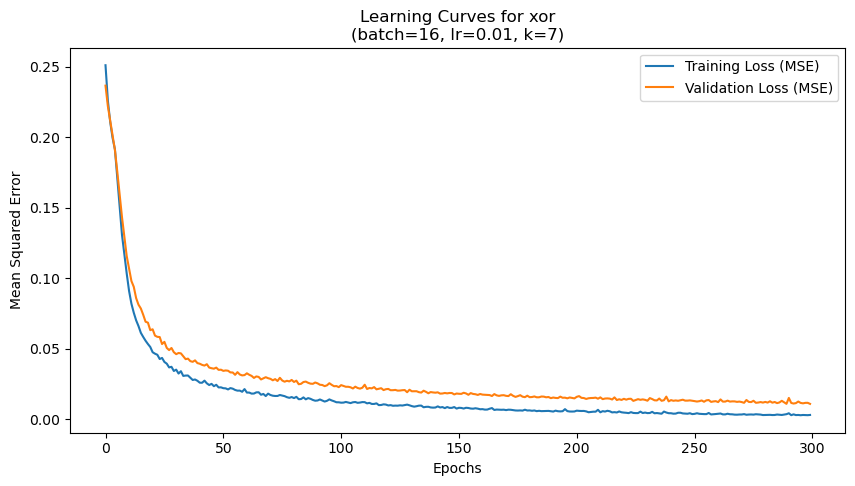

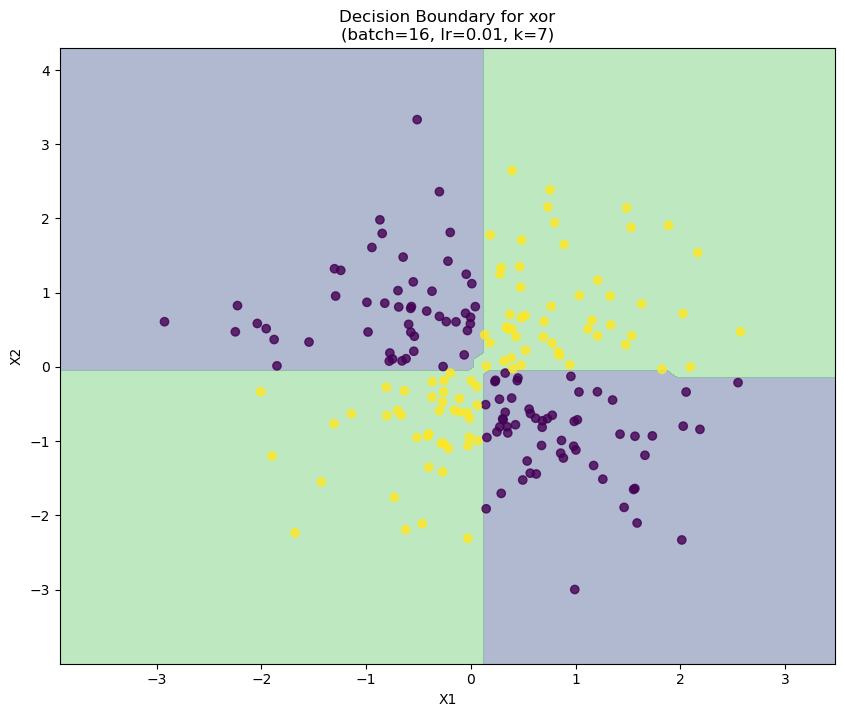

Best configuration:
Batch size: 16
Learning rate: 0.01
Hidden nodes: 7
Test accuracy: 0.9950
Final MSE: 0.005368

Processing center_surround dataset...

Testing: batch_size=16, lr=0.01, hidden_nodes=2
Epoch 0:
Training MSE: 0.236766
Validation MSE: 0.226100
Epoch 10:
Training MSE: 0.228458
Validation MSE: 0.217682
Epoch 20:
Training MSE: 0.224287
Validation MSE: 0.215348
Epoch 30:
Training MSE: 0.219459
Validation MSE: 0.216316
Epoch 40:
Training MSE: 0.216691
Validation MSE: 0.216309
Epoch 50:
Training MSE: 0.212571
Validation MSE: 0.216523
Epoch 60:
Training MSE: 0.212084
Validation MSE: 0.217275
Early stopping at epoch 67
Test Accuracy: 0.5250
Test MSE: 0.252942

Testing: batch_size=16, lr=0.01, hidden_nodes=3
Epoch 0:
Training MSE: 0.249270
Validation MSE: 0.220198
Epoch 10:
Training MSE: 0.159380
Validation MSE: 0.117780
Epoch 20:
Training MSE: 0.119390
Validation MSE: 0.081219
Epoch 30:
Training MSE: 0.098708
Validation MSE: 0.064144
Epoch 40:
Training MSE: 0.088433
Validation MS

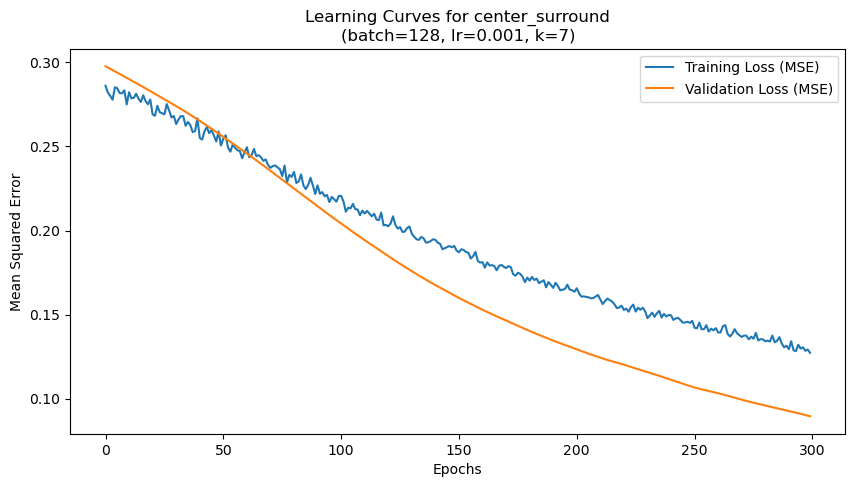

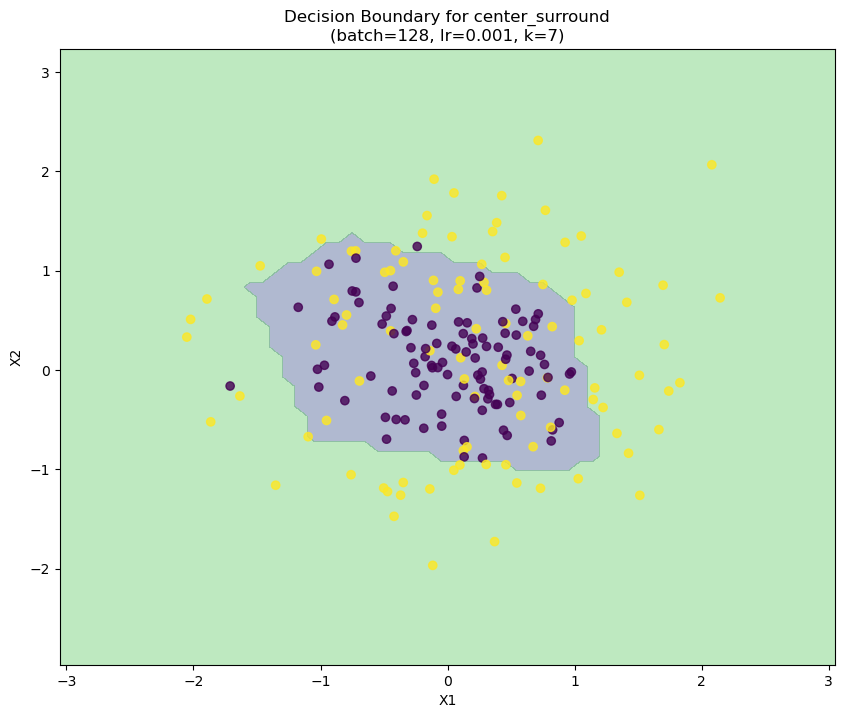

Best configuration:
Batch size: 128
Learning rate: 0.001
Hidden nodes: 7
Test accuracy: 0.7800
Final MSE: 0.182077

Processing two_gaussians dataset...

Testing: batch_size=16, lr=0.01, hidden_nodes=2
Epoch 0:
Training MSE: 0.226420
Validation MSE: 0.215390
Epoch 10:
Training MSE: 0.082419
Validation MSE: 0.068620
Epoch 20:
Training MSE: 0.050144
Validation MSE: 0.037076
Epoch 30:
Training MSE: 0.046625
Validation MSE: 0.027561
Epoch 40:
Training MSE: 0.039678
Validation MSE: 0.023974
Epoch 50:
Training MSE: 0.037709
Validation MSE: 0.021551
Epoch 60:
Training MSE: 0.035926
Validation MSE: 0.020490
Epoch 70:
Training MSE: 0.036352
Validation MSE: 0.019839
Epoch 80:
Training MSE: 0.034518
Validation MSE: 0.019389
Epoch 90:
Training MSE: 0.035926
Validation MSE: 0.018791
Epoch 100:
Training MSE: 0.033909
Validation MSE: 0.018888
Epoch 110:
Training MSE: 0.038033
Validation MSE: 0.018449
Epoch 120:
Training MSE: 0.034024
Validation MSE: 0.018247
Epoch 130:
Training MSE: 0.033409
Validatio

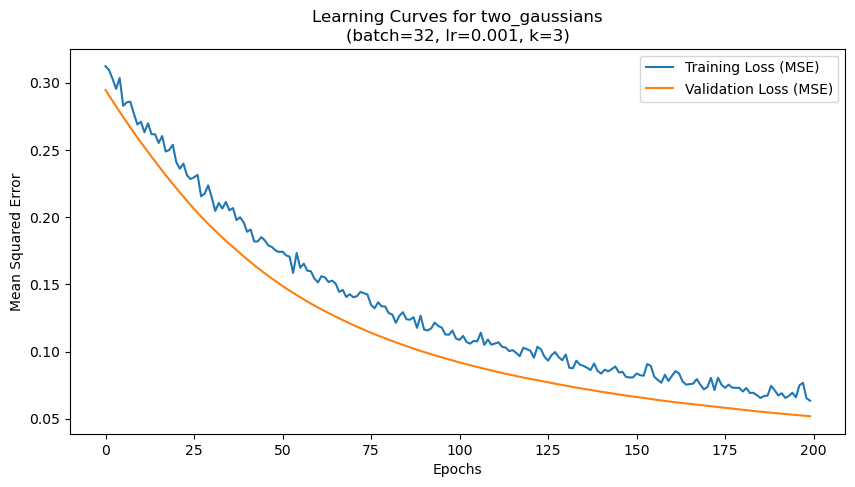

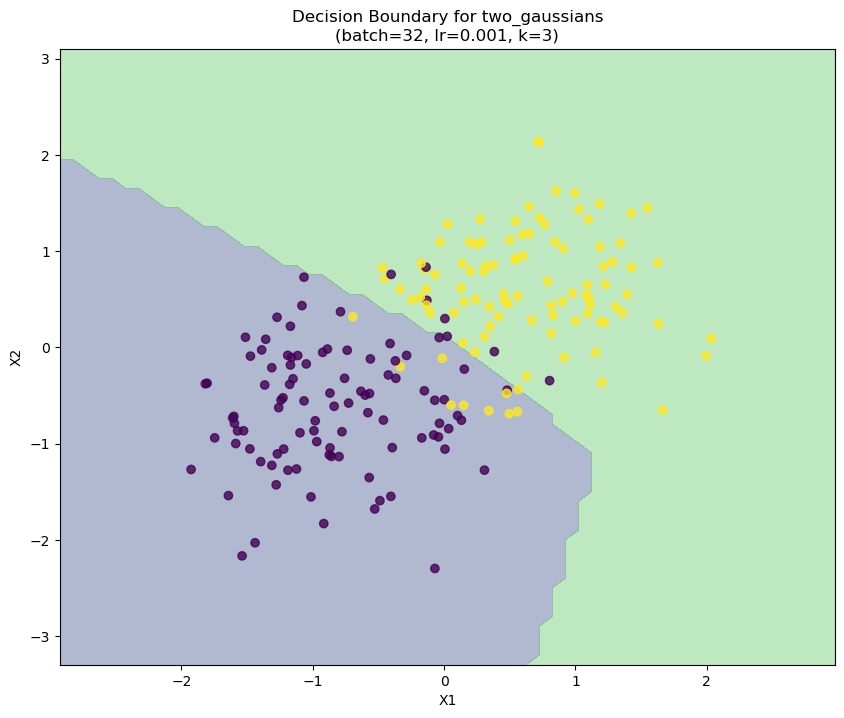

Best configuration:
Batch size: 32
Learning rate: 0.001
Hidden nodes: 3
Test accuracy: 0.9200
Final MSE: 0.091303

Processing spiral dataset...

Testing: batch_size=32, lr=0.01, hidden_nodes=5
Epoch 0:
Training MSE: 0.260383
Validation MSE: 0.243653
Epoch 10:
Training MSE: 0.161617
Validation MSE: 0.174466
Epoch 20:
Training MSE: 0.135009
Validation MSE: 0.143190
Epoch 30:
Training MSE: 0.112599
Validation MSE: 0.121001
Epoch 40:
Training MSE: 0.104246
Validation MSE: 0.105418
Epoch 50:
Training MSE: 0.098591
Validation MSE: 0.094904
Epoch 60:
Training MSE: 0.090508
Validation MSE: 0.086408
Epoch 70:
Training MSE: 0.082079
Validation MSE: 0.077949
Epoch 80:
Training MSE: 0.085492
Validation MSE: 0.070871
Epoch 90:
Training MSE: 0.074322
Validation MSE: 0.064830
Epoch 100:
Training MSE: 0.074577
Validation MSE: 0.060755
Epoch 110:
Training MSE: 0.073255
Validation MSE: 0.055899
Epoch 120:
Training MSE: 0.073541
Validation MSE: 0.052053
Epoch 130:
Training MSE: 0.066327
Validation MSE: 0

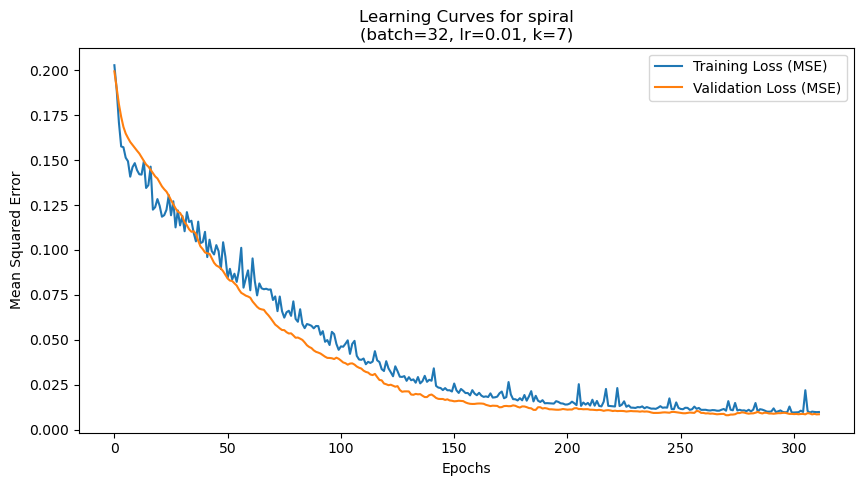

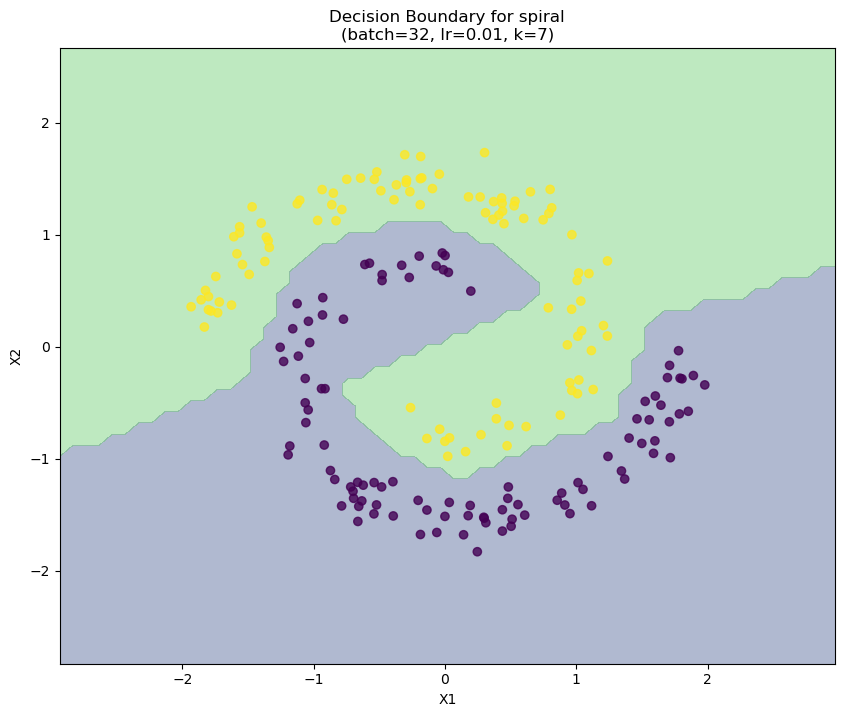

Best configuration:
Batch size: 32
Learning rate: 0.01
Hidden nodes: 7
Test accuracy: 1.0000
Final MSE: 0.002766


In [4]:

# Set random seed for reproducibility when debugging 
def set_random_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)

set_random_seed()

class FFNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FFNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.hidden_activation = nn.ReLU()
        self.layer2 = nn.Linear(hidden_dim, output_dim)
        self.output_activation = nn.Sigmoid()  # Sigmoid for binary classification
        
        # Initialize weights
        torch.nn.init.xavier_uniform_(self.layer1.weight)
        torch.nn.init.xavier_uniform_(self.layer2.weight)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.hidden_activation(x)
        x = self.layer2(x)
        x = self.output_activation(x)
        return x

def train_model_with_tuning(model, train_loader, val_loader, criterion, optimizer, num_epochs, patience):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    epochs_without_improvement = 0
    best_model_state = None
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            labels = labels.float().reshape(-1, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss / len(train_loader))
        
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                labels = labels.float().reshape(-1, 1)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        val_losses.append(val_loss / len(val_loader))
        
        # Print MSE values every 10 epochs
        if epoch % 10 == 0:
            print(f'Epoch {epoch}:')
            print(f'Training MSE: {train_losses[-1]:.6f}')
            print(f'Validation MSE: {val_losses[-1]:.6f}')
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_without_improvement = 0
            best_model_state = model.state_dict().copy()
        else:
            epochs_without_improvement += 1
        
        if epochs_without_improvement >= patience:
            print(f'Early stopping at epoch {epoch}')
            break
    
    # Load best model state
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    return train_losses, val_losses

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))
    
    mesh_input = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    
    model.eval()
    with torch.no_grad():
        Z = model(mesh_input)
        Z = (Z >= 0.5).squeeze().numpy()
    
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

def train_and_evaluate_with_tuning(dataset_name):
    hyperparameter_grid = {
        'xor': {
            'batch_sizes': [16, 32, 64],
            'learning_rates': [0.01, 0.001],
            'hidden_nodes': [3, 5, 7, 9],
            'num_epochs': 300,
            'patience': 30
        },
        'center_surround': {
            'batch_sizes': [16, 32, 64, 128],
            'learning_rates': [0.01, 0.001, 0.0005, 0.0001],
            'hidden_nodes': [2, 3, 5, 7, 9],
            'num_epochs': 300,
            'patience': 50
        },
        'two_gaussians': {
            'batch_sizes': [16, 32],
            'learning_rates': [0.01, 0.005, 0.001],
            'hidden_nodes': [2, 3, 5],
            'num_epochs': 200,
            'patience': 25
        },
        'spiral': {
            'batch_sizes': [32, 64],
            'learning_rates': [0.01, 0.005],
            'hidden_nodes': [5, 7, 9],
            'num_epochs': 400,
            'patience': 40
        }
    }

    params = hyperparameter_grid[dataset_name]
    best_accuracy = 0
    best_config = None
    best_model = None
    best_train_losses = None
    best_val_losses = None
    best_final_mse = float('inf')
    
    # Data loading and preprocessing
    train_data = pd.read_csv(f'{dataset_name}_train.csv')
    val_data = pd.read_csv(f'{dataset_name}_valid.csv')
    test_data = pd.read_csv(f'{dataset_name}_test.csv')
    
    X_train = train_data[['x1', 'x2']].values
    y_train = train_data['label'].values
    X_val = val_data[['x1', 'x2']].values
    y_val = val_data['label'].values
    X_test = test_data[['x1', 'x2']].values
    y_test = test_data['label'].values
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    X_train = torch.FloatTensor(X_train)
    y_train = torch.FloatTensor(y_train)
    X_val = torch.FloatTensor(X_val)
    y_val = torch.FloatTensor(y_val)
    X_test = torch.FloatTensor(X_test)
    y_test = torch.FloatTensor(y_test)

    for batch_size in params['batch_sizes']:
        train_dataset = TensorDataset(X_train, y_train)
        val_dataset = TensorDataset(X_val, y_val)
        test_dataset = TensorDataset(X_test, y_test)
        
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size)
        test_loader = DataLoader(test_dataset, batch_size=batch_size)
        
        for lr in params['learning_rates']:
            for hidden_dim in params['hidden_nodes']:
                print(f"\nTesting: batch_size={batch_size}, lr={lr}, hidden_nodes={hidden_dim}")
                
                model = FFNN(input_dim=2, hidden_dim=hidden_dim, output_dim=1)
                criterion = nn.MSELoss()
                optimizer = optim.Adam(model.parameters(), lr=lr)
                
                train_losses, val_losses = train_model_with_tuning(
                    model, train_loader, val_loader, criterion, optimizer,
                    params['num_epochs'], params['patience']
                )
                
                # Evaluate
                model.eval()
                correct = 0
                total = 0
                test_mse = 0.0
                with torch.no_grad():
                    for inputs, labels in test_loader:
                        outputs = model(inputs)
                        labels = labels.float().reshape(-1, 1)
                        mse = criterion(outputs, labels).item()
                        test_mse += mse
                        
                        predictions = (outputs >= 0.5).float()
                        correct += (predictions == labels).sum().item()
                        total += labels.size(0)
                
                accuracy = correct / total
                final_mse = test_mse / len(test_loader)
                
                print(f"Test Accuracy: {accuracy:.4f}")
                print(f"Test MSE: {final_mse:.6f}")
                
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_config = {
                        'batch_size': batch_size,
                        'learning_rate': lr,
                        'hidden_nodes': hidden_dim
                    }
                    best_model = model
                    best_train_losses = train_losses
                    best_val_losses = val_losses
                    best_final_mse = final_mse

    # Plot learning curves
    plt.figure(figsize=(10, 5))
    plt.plot(best_train_losses, label='Training Loss (MSE)')
    plt.plot(best_val_losses, label='Validation Loss (MSE)')
    plt.title(f'Learning Curves for {dataset_name}\n(batch={best_config["batch_size"]}, lr={best_config["learning_rate"]}, k={best_config["hidden_nodes"]})')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()
    
    # Plot decision boundary
    plot_decision_boundary(best_model, X_test.numpy(), y_test.numpy(), 
                         f'Decision Boundary for {dataset_name}\n(batch={best_config["batch_size"]}, lr={best_config["learning_rate"]}, k={best_config["hidden_nodes"]})')
    
    return best_config, best_accuracy, best_final_mse

# Run for each dataset
datasets = ['xor', 'center_surround', 'two_gaussians', 'spiral']
for dataset in datasets:
    print(f"\nProcessing {dataset} dataset...")
    best_config, best_accuracy, best_mse = train_and_evaluate_with_tuning(dataset)
    print(f"Best configuration:")
    print(f"Batch size: {best_config['batch_size']}")
    print(f"Learning rate: {best_config['learning_rate']}")
    print(f"Hidden nodes: {best_config['hidden_nodes']}")
    print(f"Test accuracy: {best_accuracy:.4f}")
    print(f"Final MSE: {best_mse:.6f}")

# Question 3.

Manual Gradients and Updates (3.0 points): Repeat either Step 1 or Step 2 without using a deep
learning platform. You can use symbolic differentiation tools like WolramAlpha, Mathematica,
etc., to compute gradients. You can also calculate the gradients by hand. You may want to calculate,
code and verify gradients for individual components of your model and use the chain rule to build
the gradients for specific weights and biases. You may also want to consider using for loops
instead of matrix algebra in some parts of your code to avoid the ambiguity of broadcasting. You
may find it helpful to “calibrate” intermediate quantities in your implementation against your
PyTorch implementation from Step 1 or 2.

## Answer:

We are repeating the Step 2, by implementing the neural network by hand with sigmoid activation function and MSE as loss function. 

For this question, we used MSE as the cost function and utilized the sigmoid function as the output layer with a 0.5 threshold applied. 

Based on those additions, we noted the following.

a. XOR Dataset
    Hyperparameters: Hidden nodes (k): 9
    Performance: Test accuracy: 0.5700

b. Center Surround Dataset
    Hyperparameters: Hidden nodes (k): 7,
    Performance: Test accuracy: 0.6

c. Two Gaussians Dataset
    Hyperparameters: Hidden nodes (k): 5
    Performance: Test accuracy: 0.92

d. Spiral Dataset
    Hyperparameters: Hidden nodes (k): 2
    Performance:Test accuracy: 0.81
    Analysis: The model performed slightly lower i.e. the test accuracy dropped from 1 to 0.81 as compared to implementation with pytorch.

Comparison between Cross-Entropy and MSE Implementations revealed several differences:

a. Architectural Differences: With the same architecture as Step 2, we have rewritten the code using numpy only withotu using pytorch.


b. Performance Comparison:
The XOR dataset didn't perform as expected as compared to the previous implementation with pytorch as compared to 1 in the previous implementation.
For the Center-Surround dataset model performed slightly lower as compared to pytorch implementation from 0.78 to 0.6
Two Gaussians - The model maintained comparable accuracy (92%) across both implementations
For the Spiral dataset, The model performed slightly lower i.e. the test accuracy dropped from 1 to 0.81 as compared to implementation with pytorch.

In [9]:
def load_and_preprocess_datasets():
    datasets = {}
    dataset_names = ['center_surround', 'spiral', 'two_gaussians', 'xor']
    
    for name in dataset_names:
        train_data = pd.read_csv(f'{name}_train.csv')
        val_data = pd.read_csv(f'{name}_valid.csv')
        test_data = pd.read_csv(f'{name}_test.csv')
        
        X_train = train_data[['x1', 'x2']].values
        y_train = train_data['label'].values
        X_val = val_data[['x1', 'x2']].values
        y_val = val_data['label'].values
        X_test = test_data[['x1', 'x2']].values
        y_test = test_data['label'].values
        
        # Standardize features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)
        
        datasets[name] = {
            'train': (X_train, y_train),
            'valid': (X_val, y_val),
            'test': (X_test, y_test)
        }
    
    return datasets

In [10]:
class ManualNeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim):
        # Initialize weights with Xavier initialization
        self.W1 = np.random.randn(input_dim, hidden_dim) * np.sqrt(2.0 / input_dim)
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, output_dim) * np.sqrt(2.0 / hidden_dim)
        self.b2 = np.zeros((1, output_dim))
    
    def tanh(self, x):
        pos_exp = np.exp(x)
        neg_exp = np.exp(-x)
        return (pos_exp - neg_exp) / (pos_exp + neg_exp)
    
    def tanh_derivative(self, x):
        return 1.0 - np.square(self.tanh(x))
    
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-np.clip(x, -500, 500)))
    
    def sigmoid_derivative(self, x):
        s = self.sigmoid(x)
        return s * (1.0 - s)
    
    def forward(self, X):
        # Initialize arrays for activations
        m = X.shape[0] 
        self.z1 = np.zeros((m, self.W1.shape[1]))
        self.a1 = np.zeros((m, self.W1.shape[1]))
        self.z2 = np.zeros((m, self.W2.shape[1]))
        self.a2 = np.zeros((m, self.W2.shape[1]))
        
        for i in range(m):
            # First layer
            for j in range(self.W1.shape[1]):
                # Manual dot product for input layer
                self.z1[i, j] = self.b1[0, j]
                for k in range(X.shape[1]):
                    self.z1[i, j] += X[i, k] * self.W1[k, j]
                self.a1[i, j] = self.tanh(self.z1[i, j])
            
            # Second layer
            for j in range(self.W2.shape[1]):
                # Manual dot product for output layer
                self.z2[i, j] = self.b2[0, j]
                for k in range(self.W2.shape[0]):
                    self.z2[i, j] += self.a1[i, k] * self.W2[k, j]
                self.a2[i, j] = self.sigmoid(self.z2[i, j])
        
        return self.a2
    
    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        
        # Initialize gradient matrices
        dW1 = np.zeros_like(self.W1)
        db1 = np.zeros_like(self.b1)
        dW2 = np.zeros_like(self.W2)
        db2 = np.zeros_like(self.b2)
        
        for i in range(m):
            # Output layer gradients
            dz2_i = self.a2[i] - y[i]  # dL/da2 * da2/dz2
            
            # Hidden layer gradients
            da1_i = np.zeros(self.W1.shape[1])
            for j in range(self.W2.shape[1]):
                for k in range(self.W2.shape[0]):
                    da1_i[k] += dz2_i[j] * self.W2[k, j]
            
            dz1_i = da1_i * self.tanh_derivative(self.z1[i])
            
            # Weight gradients using explicit loops
            for j in range(self.W1.shape[1]):
                for k in range(self.W1.shape[0]):
                    dW1[k, j] += X[i, k] * dz1_i[j]
                db1[0, j] += dz1_i[j]
                
            for j in range(self.W2.shape[1]):
                for k in range(self.W2.shape[0]):
                    dW2[k, j] += self.a1[i, k] * dz2_i[j]
                db2[0, j] += dz2_i[j]
        
        # Update weights and biases
        self.W2 -= learning_rate * dW2 / m
        self.b2 -= learning_rate * db2 / m
        self.W1 -= learning_rate * dW1 / m
        self.b1 -= learning_rate * db1 / m


In [11]:
def train_manual_model(model, X_train, y_train, X_val, y_val, learning_rate, num_epochs=300, patience=30):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    epochs_without_improvement = 0
    
    # Reshape targets
    y_train = y_train.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    
    for epoch in range(num_epochs):
        # Forward pass
        y_pred = model.forward(X_train)
        
        # Compute MSE loss
        train_loss = np.mean(np.square(y_pred - y_train))
        train_losses.append(train_loss)
        
        # Backward pass
        model.backward(X_train, y_train, learning_rate)
        
        # Validation
        y_val_pred = model.forward(X_val)
        val_loss = np.mean(np.square(y_val_pred - y_val))
        val_losses.append(val_loss)
        
        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
            
        if epochs_without_improvement >= patience:
            print(f'Early stopping at epoch {epoch}')
            break
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
            
    return train_losses, val_losses

In [12]:
def evaluate_manual_model(model, X, y):
    predictions = (model.forward(X) > 0.5).astype(int)
    return np.mean(predictions.reshape(-1) == y)

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.forward(mesh_points)
    Z = (Z > 0.5).reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()


Processing center_surround dataset
Epoch 0: Train Loss: 0.2509, Val Loss: 0.2564
Epoch 10: Train Loss: 0.2508, Val Loss: 0.2562
Epoch 20: Train Loss: 0.2507, Val Loss: 0.2560
Epoch 30: Train Loss: 0.2506, Val Loss: 0.2558
Epoch 40: Train Loss: 0.2505, Val Loss: 0.2557
Epoch 50: Train Loss: 0.2504, Val Loss: 0.2555
Epoch 60: Train Loss: 0.2503, Val Loss: 0.2553
Epoch 70: Train Loss: 0.2502, Val Loss: 0.2551
Epoch 80: Train Loss: 0.2501, Val Loss: 0.2550
Epoch 90: Train Loss: 0.2500, Val Loss: 0.2548
Epoch 100: Train Loss: 0.2499, Val Loss: 0.2547
Epoch 110: Train Loss: 0.2498, Val Loss: 0.2545
Epoch 120: Train Loss: 0.2497, Val Loss: 0.2544
Epoch 130: Train Loss: 0.2497, Val Loss: 0.2542
Epoch 140: Train Loss: 0.2496, Val Loss: 0.2541
Epoch 150: Train Loss: 0.2495, Val Loss: 0.2540
Epoch 160: Train Loss: 0.2494, Val Loss: 0.2538
Epoch 170: Train Loss: 0.2494, Val Loss: 0.2537
Epoch 180: Train Loss: 0.2493, Val Loss: 0.2536
Epoch 190: Train Loss: 0.2492, Val Loss: 0.2535
Epoch 200: Trai

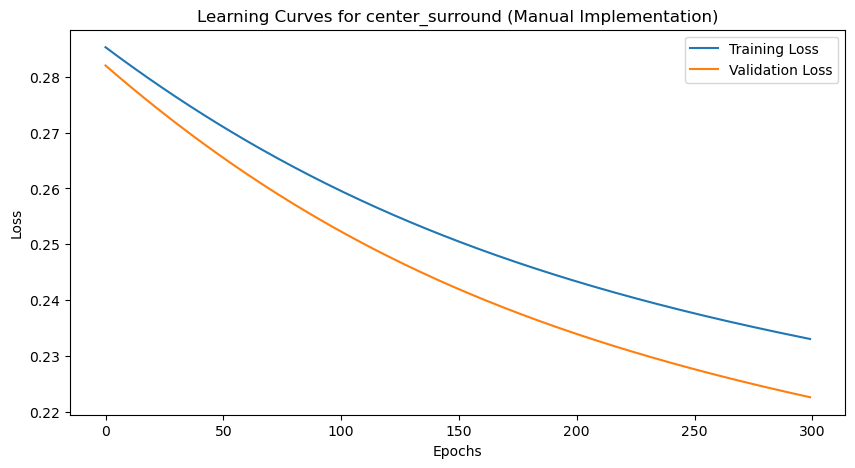

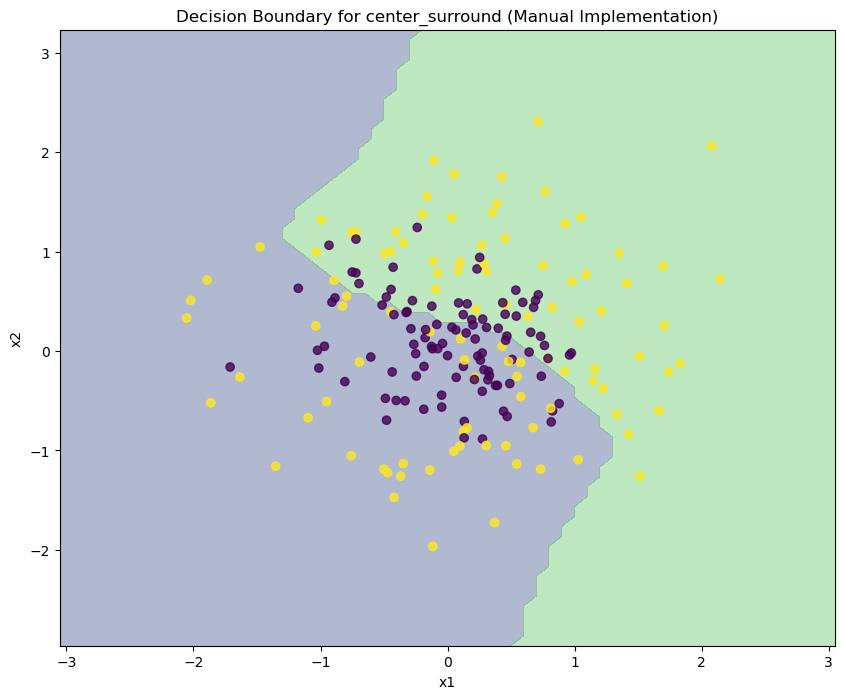


Processing spiral dataset
Epoch 0: Train Loss: 0.3386, Val Loss: 0.3151
Epoch 10: Train Loss: 0.3207, Val Loss: 0.2988
Epoch 20: Train Loss: 0.3026, Val Loss: 0.2826
Epoch 30: Train Loss: 0.2850, Val Loss: 0.2670
Epoch 40: Train Loss: 0.2687, Val Loss: 0.2527
Epoch 50: Train Loss: 0.2540, Val Loss: 0.2400
Epoch 60: Train Loss: 0.2412, Val Loss: 0.2291
Epoch 70: Train Loss: 0.2304, Val Loss: 0.2199
Epoch 80: Train Loss: 0.2212, Val Loss: 0.2122
Epoch 90: Train Loss: 0.2135, Val Loss: 0.2059
Epoch 100: Train Loss: 0.2071, Val Loss: 0.2006
Epoch 110: Train Loss: 0.2017, Val Loss: 0.1962
Epoch 120: Train Loss: 0.1971, Val Loss: 0.1925
Epoch 130: Train Loss: 0.1932, Val Loss: 0.1894
Epoch 140: Train Loss: 0.1898, Val Loss: 0.1868
Epoch 150: Train Loss: 0.1870, Val Loss: 0.1845
Epoch 160: Train Loss: 0.1845, Val Loss: 0.1826
Epoch 170: Train Loss: 0.1823, Val Loss: 0.1810
Epoch 180: Train Loss: 0.1804, Val Loss: 0.1795
Epoch 190: Train Loss: 0.1787, Val Loss: 0.1782
Epoch 200: Train Loss: 0

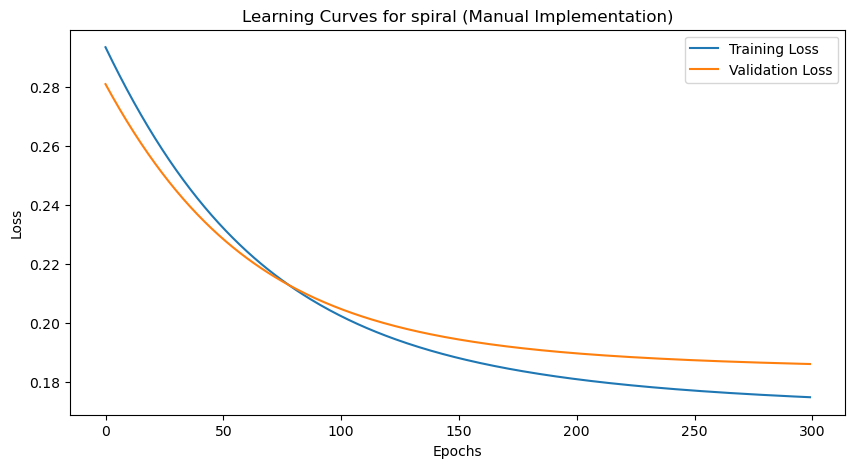

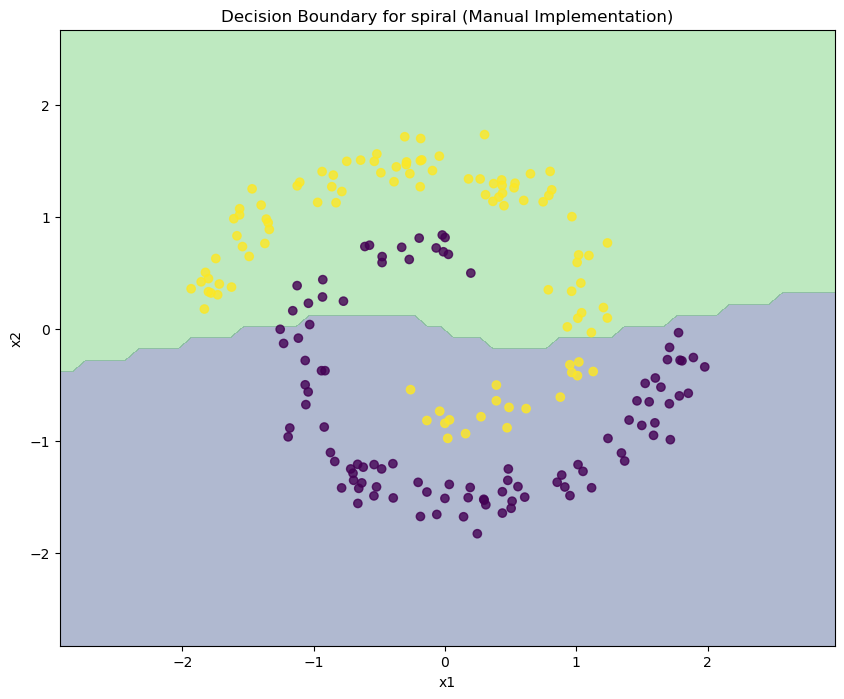


Processing two_gaussians dataset
Epoch 0: Train Loss: 0.2272, Val Loss: 0.2203
Epoch 10: Train Loss: 0.2188, Val Loss: 0.2116
Epoch 20: Train Loss: 0.2108, Val Loss: 0.2032
Epoch 30: Train Loss: 0.2032, Val Loss: 0.1953
Epoch 40: Train Loss: 0.1959, Val Loss: 0.1877
Epoch 50: Train Loss: 0.1890, Val Loss: 0.1805
Epoch 60: Train Loss: 0.1824, Val Loss: 0.1737
Epoch 70: Train Loss: 0.1761, Val Loss: 0.1672
Epoch 80: Train Loss: 0.1701, Val Loss: 0.1611
Epoch 90: Train Loss: 0.1644, Val Loss: 0.1553
Epoch 100: Train Loss: 0.1590, Val Loss: 0.1497
Epoch 110: Train Loss: 0.1539, Val Loss: 0.1445
Epoch 120: Train Loss: 0.1490, Val Loss: 0.1395
Epoch 130: Train Loss: 0.1444, Val Loss: 0.1348
Epoch 140: Train Loss: 0.1400, Val Loss: 0.1303
Epoch 150: Train Loss: 0.1358, Val Loss: 0.1260
Epoch 160: Train Loss: 0.1319, Val Loss: 0.1220
Epoch 170: Train Loss: 0.1281, Val Loss: 0.1181
Epoch 180: Train Loss: 0.1245, Val Loss: 0.1145
Epoch 190: Train Loss: 0.1211, Val Loss: 0.1110
Epoch 200: Train 

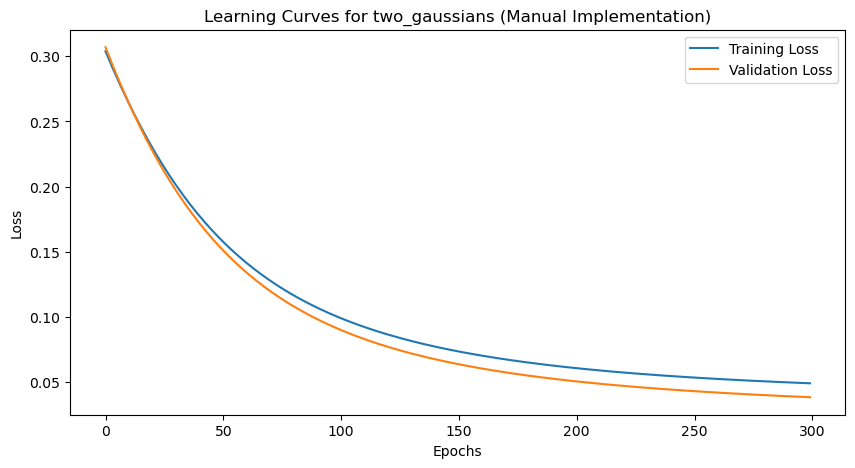

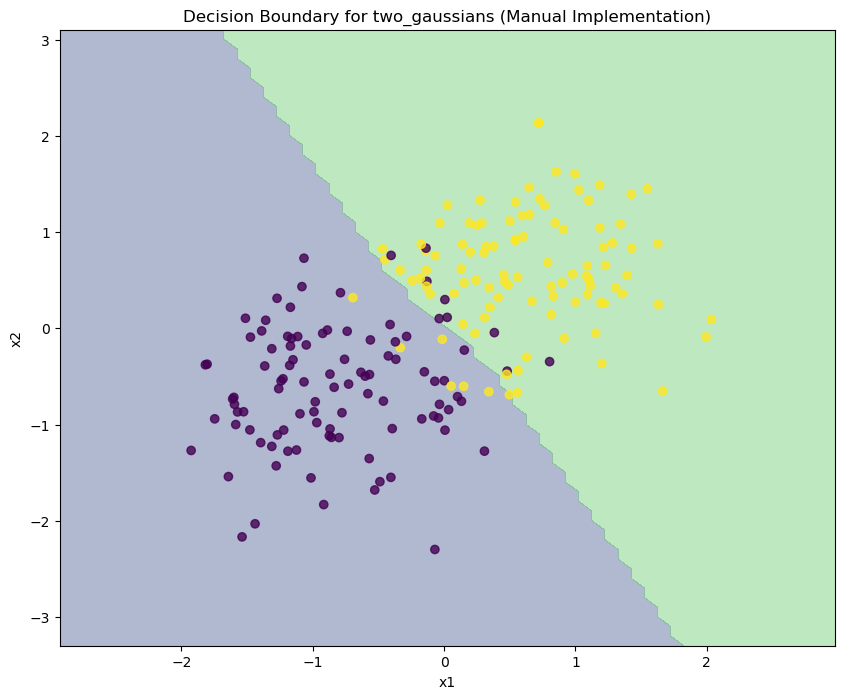


Processing xor dataset
Epoch 0: Train Loss: 0.2729, Val Loss: 0.2731
Epoch 10: Train Loss: 0.2715, Val Loss: 0.2725
Epoch 20: Train Loss: 0.2701, Val Loss: 0.2719
Epoch 30: Train Loss: 0.2689, Val Loss: 0.2714
Epoch 40: Train Loss: 0.2676, Val Loss: 0.2709
Epoch 50: Train Loss: 0.2665, Val Loss: 0.2704
Epoch 60: Train Loss: 0.2654, Val Loss: 0.2700
Epoch 70: Train Loss: 0.2644, Val Loss: 0.2696
Epoch 80: Train Loss: 0.2634, Val Loss: 0.2693
Epoch 90: Train Loss: 0.2625, Val Loss: 0.2689
Epoch 100: Train Loss: 0.2617, Val Loss: 0.2686
Epoch 110: Train Loss: 0.2609, Val Loss: 0.2683
Epoch 120: Train Loss: 0.2601, Val Loss: 0.2680
Epoch 130: Train Loss: 0.2594, Val Loss: 0.2678
Epoch 140: Train Loss: 0.2587, Val Loss: 0.2676
Epoch 150: Train Loss: 0.2581, Val Loss: 0.2673
Epoch 160: Train Loss: 0.2575, Val Loss: 0.2671
Epoch 170: Train Loss: 0.2569, Val Loss: 0.2669
Epoch 180: Train Loss: 0.2563, Val Loss: 0.2667
Epoch 190: Train Loss: 0.2558, Val Loss: 0.2666
Epoch 200: Train Loss: 0.25

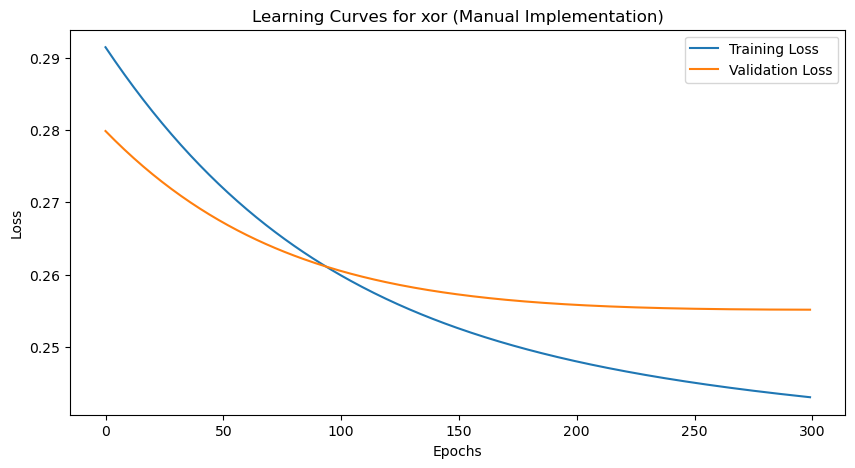

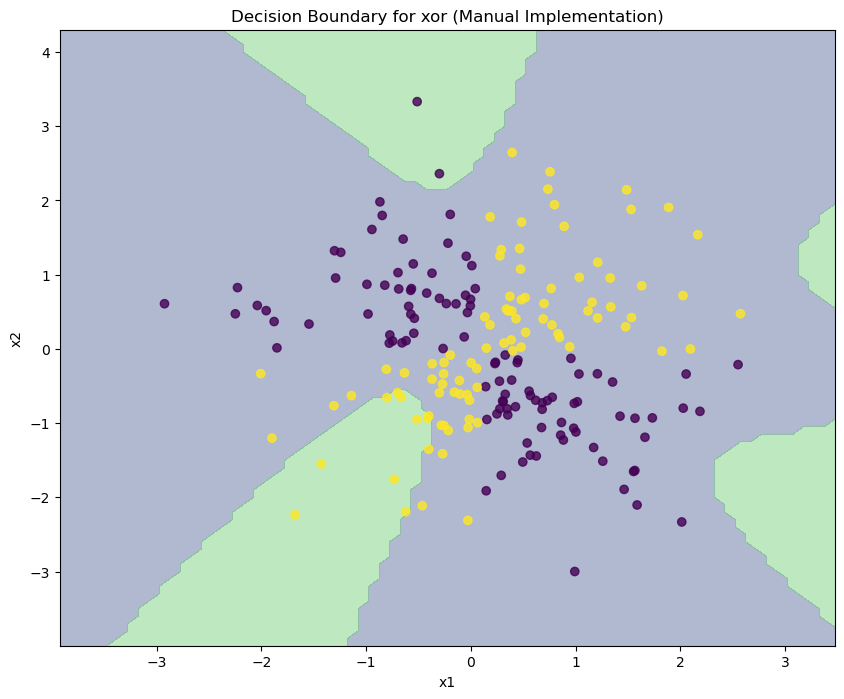

In [13]:
# Main execution
datasets = load_and_preprocess_datasets()
hidden_nodes = [2, 3, 5, 7, 9]
input_dim = 2
output_dim = 1
learning_rate = 0.01

for dataset_name, data in datasets.items():
    print(f"\nProcessing {dataset_name} dataset")
    
    X_train, y_train = data['train']
    X_val, y_val = data['valid']
    X_test, y_test = data['test']
    
    best_model = None
    best_accuracy = 0
    best_k = 0
    
    for k in hidden_nodes:
        model = ManualNeuralNetwork(input_dim=input_dim, hidden_dim=k, output_dim=output_dim)
        
        train_losses, val_losses = train_manual_model(model, X_train, y_train, X_val, y_val, learning_rate)
        
        accuracy = evaluate_manual_model(model, X_test, y_test)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_k = k
    
    print(f"Best number of hidden nodes: {best_k}")
    print(f"Best test accuracy: {best_accuracy:.4f}")
    
    # Plot learning curves
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f"Learning Curves for {dataset_name} (Manual Implementation)")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
    # Plot decision boundary
    plot_decision_boundary(best_model, X_test, y_test, f"Decision Boundary for {dataset_name} (Manual Implementation)")

# Q4. 

Regularizers (3.0 points): Repeat either Step 1 or 2 above, adding two regularizers to your
PyTorch implementation. The first regularizer should minimize the norm of the input layer weight
matrix. The second regularizer should encourage orthogonality in the intermediate decision
boundaries learned in the first layer (note: we discussed this in class as interpreting the output of
each hidden node as a single layer perceptron where the weight matrix feeding into a hidden node
can be thought of as the g(x) in the perceptron). In addition to items a through e listed under step
one, plot the intermediate decision boundaries of the regularized and unregularized FFNN (see
example below). You may find it helpful to work with either the xor data with k = 3 for MSE, or
the spiral dataset with k = 3 for MCE.

## Answer:

We have repeated the step 2 by adding two regularizer terms and performed the comparison with the two trainings i.e. without regularization and with regularization.
We can observe that the model training with regularization took more time to converge as compared to without regularization (leading to overfitting).

We considered k=3, with MSE loss for XOR dataset and observed the following results:

1) Unregularized Model Performance:
   
* Training Accuracy: 0.7600
* Validation Accuracy: 0.6700
* Test Accuracy: 0.6850
* Test MSE Loss: 0.189281


1) Regularized Model:
   
* Training Accuracy: 0.8850
* Validation Accuracy: 0.8400
* Test Accuracy: 0.8250
* Test MSE Loss: 0.110263

From the above results, we can observe that test accuracy of the regularized model is better than test accuracy os unregularized model.
Therefore regularization has reduced overfitting and fit a robust model.

In [23]:
class RegularizedFFNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(RegularizedFFNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.hidden_activation = nn.Tanh()  # Changed to tanh for better visualization
        self.layer2 = nn.Linear(hidden_dim, output_dim)
        self.output_activation = nn.Sigmoid()
        
        # Initialize weights
        torch.nn.init.xavier_uniform_(self.layer1.weight)
        torch.nn.init.xavier_uniform_(self.layer2.weight)
    
    def forward(self, x):
        self.z1 = self.layer1(x)  # Store pre-activation
        self.h1 = self.hidden_activation(self.z1)  # Store hidden activation
        x = self.layer2(self.h1)
        x = self.output_activation(x)
        return x
    
    def get_hidden_activations(self, x):
        """Get intermediate activations for visualization"""
        self.z1 = self.layer1(x)
        return self.hidden_activation(self.z1)

def compute_regularization_loss(model, lambda1=0.01, lambda2=0.01):
    """
    Compute regularization terms:
    1. L2 norm of input layer weights
    2. Orthogonality penalty on hidden layer weights
    """
    # First regularizer: L2 norm of input layer weights
    l2_norm = torch.norm(model.layer1.weight, p=2)
    
    # Second regularizer: Orthogonality penalty
    W = model.layer1.weight
    WWT = torch.mm(W, W.t())
    I = torch.eye(WWT.shape[0], device=W.device)
    orthogonality_penalty = torch.norm(WWT - I)
    
    return lambda1 * l2_norm + lambda2 * orthogonality_penalty


def evaluate_model(model, X, y, criterion):
    """Evaluate model's accuracy and loss"""
    model.eval()
    with torch.no_grad():
        outputs = model(torch.FloatTensor(X))
        # Calculate MSE loss
        loss = criterion(outputs, torch.FloatTensor(y).reshape(-1, 1))
        # Calculate accuracy
        predictions = (outputs >= 0.5).float().numpy().reshape(-1)
        accuracy = np.mean(predictions == y)
    return accuracy, loss.item()

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, patience, lambda1=0.01, lambda2=0.01):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    epochs_without_improvement = 0
    best_model_state = None
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            labels = labels.float().reshape(-1, 1)
            
            # Compute MSE loss
            mse_loss = criterion(outputs, labels)
            
            # Add regularization terms
            reg_loss = compute_regularization_loss(model, lambda1, lambda2)
            total_loss = mse_loss + reg_loss
            
            total_loss.backward()
            optimizer.step()
            train_loss += total_loss.item()
            
        train_losses.append(train_loss / len(train_loader))
        
        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                labels = labels.float().reshape(-1, 1)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        val_losses.append(val_loss / len(val_loader))
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch}:')
            print(f'Training Loss: {train_losses[-1]:.6f}')
            print(f'Validation Loss: {val_losses[-1]:.6f}')
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_without_improvement = 0
            best_model_state = model.state_dict().copy()
        else:
            epochs_without_improvement += 1
            
        if epochs_without_improvement >= patience:
            print(f'Early stopping at epoch {epoch}')
            break
    
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    return train_losses, val_losses

def plot_decision_boundaries(model, X, y, title, is_regularized=True):
    """Plot composite and individual node decision boundaries"""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))
    
    mesh_input = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    
    model.eval()
    with torch.no_grad():
        # Get composite decision boundary
        Z_composite = model(mesh_input)
        Z_composite = (Z_composite >= 0.5).squeeze().numpy()
        
        # Get individual node activations
        hidden_activations = model.get_hidden_activations(mesh_input)
        Z_nodes = (hidden_activations >= 0).numpy()
    
    # Create subplot for composite and individual nodes
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    fig.suptitle(f'{title} {"(Regularized)" if is_regularized else "(Unregularized)"}')
    
    # Plot composite decision boundary
    axes[0].contourf(xx, yy, Z_composite.reshape(xx.shape), alpha=0.4)
    axes[0].scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    axes[0].set_title('Composite')
    
    # Plot individual node decision boundaries
    for i in range(3):
        axes[i+1].contourf(xx, yy, Z_nodes[:, i].reshape(xx.shape), alpha=0.4)
        axes[i+1].scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
        axes[i+1].set_title(f'Node {i}')
    
    plt.tight_layout()
    plt.show()



In [26]:
def train_and_compare_models(X_train, y_train, X_val, y_val, X_test, y_test):
    # Model parameters
    input_dim = 2
    hidden_dim = 3  # Fixed k=3 for XOR dataset
    output_dim = 1
    batch_size = 32
    learning_rate = 0.01
    num_epochs = 300
    patience = 30
    
    # Create dataloaders
    train_dataset = TensorDataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
    val_dataset = TensorDataset(torch.FloatTensor(X_val), torch.FloatTensor(y_val))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    
    # Train unregularized model
    unregularized_model = RegularizedFFNN(input_dim, hidden_dim, output_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(unregularized_model.parameters(), lr=learning_rate)
    unreg_train_losses, unreg_val_losses = train_model(
        unregularized_model, train_loader, val_loader, criterion, optimizer, 
        num_epochs, patience, lambda1=0, lambda2=0
    )
    
    # Evaluate unregularized model
    unreg_train_acc, unreg_train_loss = evaluate_model(unregularized_model, X_train, y_train, criterion)
    unreg_val_acc, unreg_val_loss = evaluate_model(unregularized_model, X_val, y_val, criterion)
    unreg_test_acc, unreg_test_loss = evaluate_model(unregularized_model, X_test, y_test, criterion)
    
    print("\nUnregularized Model Performance:")
    print(f"Training Accuracy: {unreg_train_acc:.4f}")
    print(f"Validation Accuracy: {unreg_val_acc:.4f}")
    print(f"Test Accuracy: {unreg_test_acc:.4f}")
    print(f"Test MSE Loss: {unreg_test_loss:.6f}")
    
    
    # Train regularized model
    regularized_model = RegularizedFFNN(input_dim, hidden_dim, output_dim)
    optimizer = optim.Adam(regularized_model.parameters(), lr=learning_rate)
    reg_train_losses, reg_val_losses = train_model(
        regularized_model, train_loader, val_loader, criterion, optimizer, 
        num_epochs, patience, lambda1=0.01, lambda2=0.01
    )
    
    # Evaluate regularized model
    reg_train_acc, reg_train_loss = evaluate_model(regularized_model, X_train, y_train, criterion)
    reg_val_acc, reg_val_loss = evaluate_model(regularized_model, X_val, y_val, criterion)
    reg_test_acc, reg_test_loss = evaluate_model(regularized_model, X_test, y_test, criterion)
    
    print("\nRegularized Model Performance:")
    print(f"Training Accuracy: {reg_train_acc:.4f}")
    print(f"Validation Accuracy: {reg_val_acc:.4f}")
    print(f"Test Accuracy: {reg_test_acc:.4f}")
    print(f"Test MSE Loss: {reg_test_loss:.6f}")
    
    # Plot learning curves
    plt.figure(figsize=(10, 5))
    plt.plot(unreg_train_losses, label='Unregularized Training Loss')
    plt.plot(unreg_val_losses, label='Unregularized Validation Loss')
    plt.plot(reg_train_losses, label='Regularized Training Loss')
    plt.plot(reg_val_losses, label='Regularized Validation Loss')
    plt.title('Learning Curves (XOR Dataset, k=3)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Plot decision boundaries for both models
    plot_decision_boundaries(unregularized_model, X_test, y_test, 'XOR Dataset', False)
    plot_decision_boundaries(regularized_model, X_test, y_test, 'XOR Dataset', True)

Epoch 0:
Training Loss: 0.298402
Validation Loss: 0.259946
Epoch 10:
Training Loss: 0.233985
Validation Loss: 0.244705
Epoch 20:
Training Loss: 0.215217
Validation Loss: 0.236446
Epoch 30:
Training Loss: 0.201919
Validation Loss: 0.223787
Epoch 40:
Training Loss: 0.200966
Validation Loss: 0.210607
Epoch 50:
Training Loss: 0.199010
Validation Loss: 0.198748
Epoch 60:
Training Loss: 0.187149
Validation Loss: 0.195313
Epoch 70:
Training Loss: 0.180826
Validation Loss: 0.191119
Epoch 80:
Training Loss: 0.180090
Validation Loss: 0.187482
Epoch 90:
Training Loss: 0.173803
Validation Loss: 0.187398
Epoch 100:
Training Loss: 0.181923
Validation Loss: 0.185192
Epoch 110:
Training Loss: 0.175383
Validation Loss: 0.185865
Epoch 120:
Training Loss: 0.179173
Validation Loss: 0.182462
Epoch 130:
Training Loss: 0.175181
Validation Loss: 0.187635
Epoch 140:
Training Loss: 0.190112
Validation Loss: 0.181196
Epoch 150:
Training Loss: 0.163603
Validation Loss: 0.181414
Epoch 160:
Training Loss: 0.165759


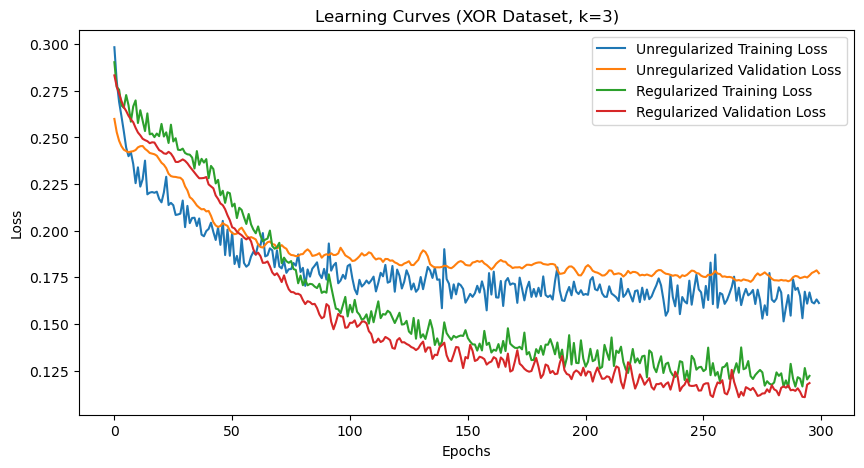

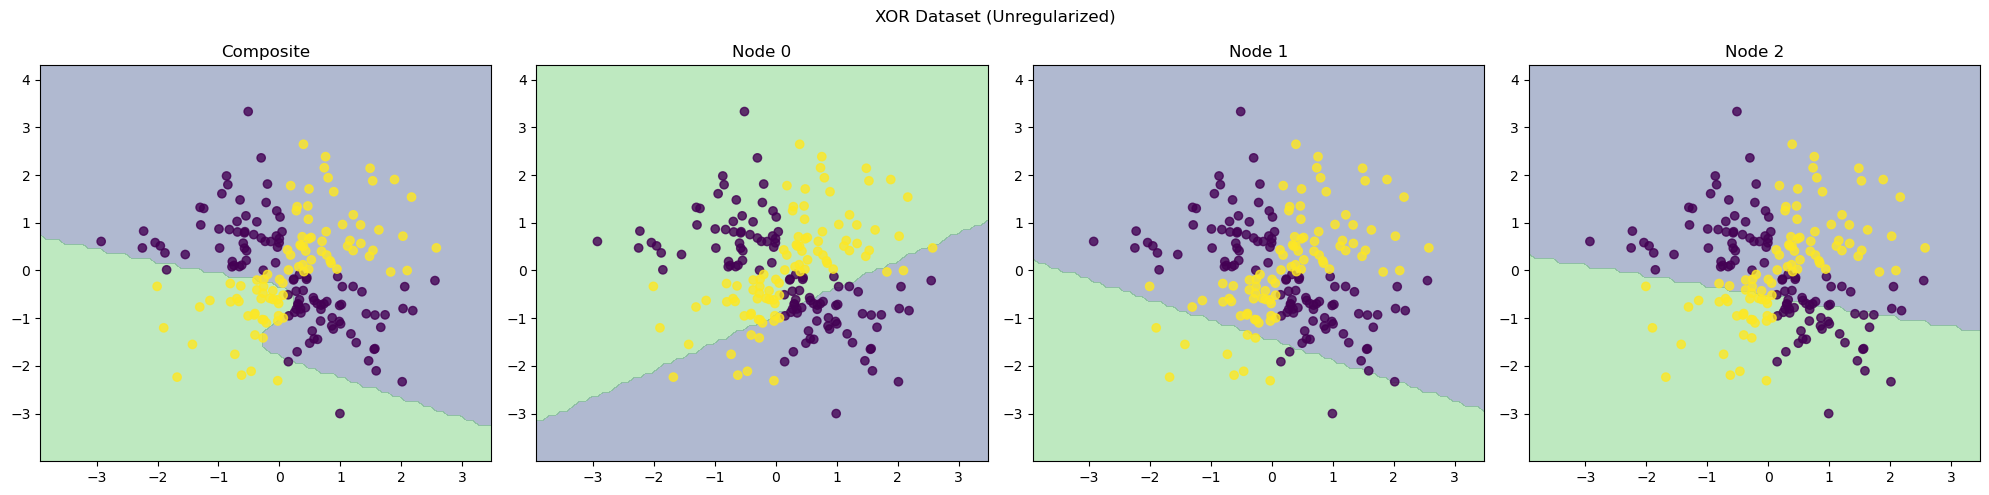

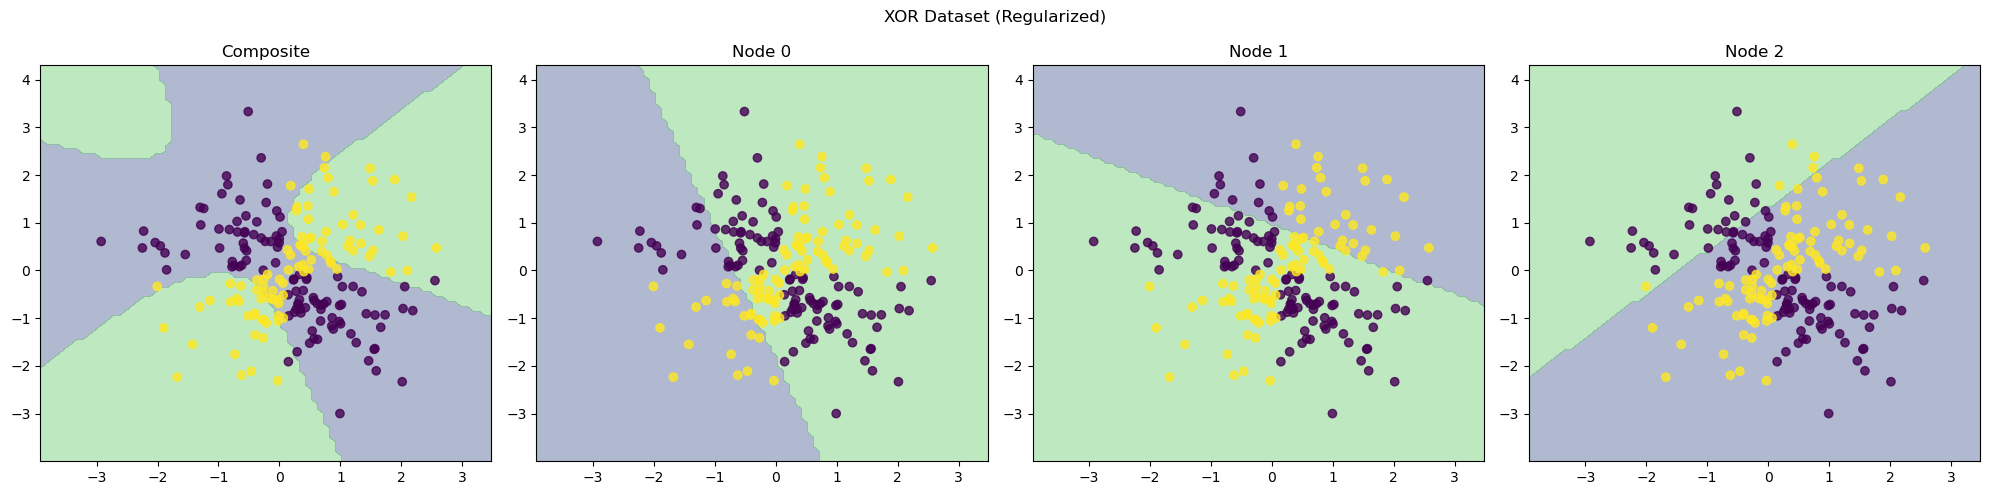

In [27]:
train_and_compare_models(X_train, y_train, X_val, y_val, X_test, y_test)